In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [44]:
data=pd.read_csv('train.csv')
data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1,15
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0,70
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0,20
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0,20


In [45]:
data = data.drop(columns=['Id','Subject Focus'])

In [46]:
xVars = data.drop('Pawpularity',axis=1)
yVars = data['Pawpularity']

xTrain, xValid, yTrain, yValid = train_test_split(xVars,yVars,test_size=0.3,random_state=43)

print(xTrain.shape)
print(data.shape)

(6938, 11)
(9912, 12)


In [47]:
regressor = RandomForestRegressor(n_estimators=50, random_state=43)
regressor.fit(xTrain,yTrain)

RandomForestRegressor(n_estimators=50, random_state=43)

In [48]:
y_pred = regressor.predict(xValid)
y_pred

array([38.35747438, 35.59669029, 38.35747438, ..., 38.35747438,
       38.35747438, 38.16696931])

In [49]:
y_pred = pd.DataFrame(y_pred, columns=['yPredict'])

In [50]:
y_pred

,yPredict
0,38.357474
1,35.596690
2,38.357474
3,36.675878
4,38.528045
...,...
2969,38.357474
2970,34.916938
2971,38.357474
2972,38.357474


In [55]:
yValid

5109    35
6693    24
8515    17
5064    79
6025    41
        ..
5719    38
4053    16
5893    19
1140    48
1473    53
Name: Pawpularity, Length: 2974, dtype: int64

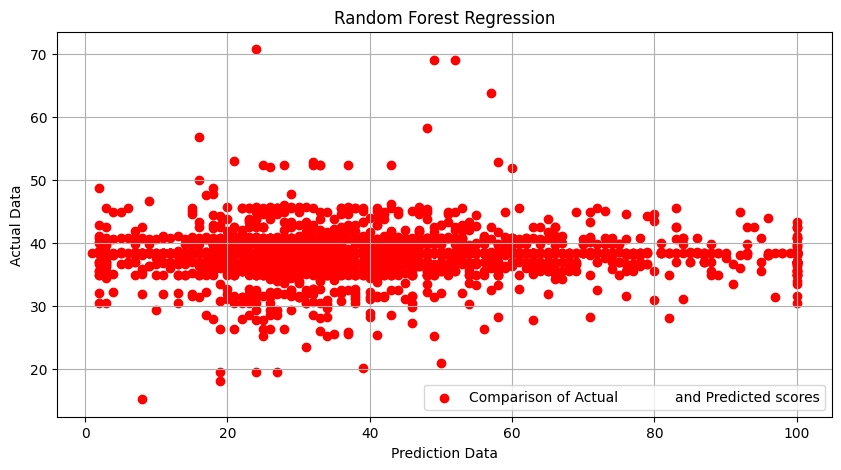

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(yValid,y_pred, color="red", label="Comparison of Actual \
            and Predicted scores")
plt.legend()
plt.grid()
plt.title("Random Forest Regression")
plt.xlabel("Prediction Data")
plt.ylabel("Actual Data")
plt.show()

In [57]:
metrics.r2_score(yValid,y_pred)

-0.017237910820651958

In [58]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(yValid,y_pred))
rmse

20.50980527884124